In [9]:
# 9/15
# Plot ecDNA z-scores aggregated by metacell.
import pandas as pd
import seaborn as sns
import os
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [10]:
SAMPLE="RCMB56-ht"
GENE="DNTTIP2"
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("white")
sns.despine()

<Figure size 576x432 with 0 Axes>

(0.7925281734182714, 1.1016308832379456e-09)


,z-score,DNTTIP2,DNTTIP2 expression
mc@mc,,,
1,8.538397,-0.356007,-0.356007
2,9.971123,-0.341759,-0.341759
3,8.270484,-0.369200,-0.369200
4,10.451787,-0.339866,-0.339866
5,9.654862,-0.358896,-0.358896
6,9.616360,-0.336942,-0.336942
7,6.605988,-0.351833,-0.351833
8,7.272054,-0.390160,-0.390160
9,8.767492,-0.367209,-0.367209


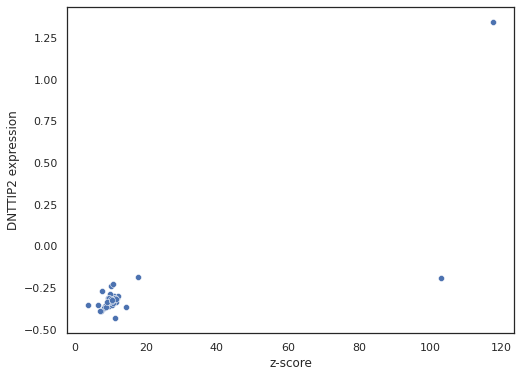

In [11]:
def get_poisson_scores(sample,ecDNA):
    if not str(ecDNA).startswith('ecDNA'):
        ecDNA='ecDNA'+str(ecDNA)
    poisson_tbl="../2021-08-17_featurecounts-permutation-2/"+sample+"_"+ecDNA+"_poisson.tsv"
    df = pd.read_csv(poisson_tbl,sep='\t',index_col=0)
    return df[['z-score']]

def get_metacells(sample):
    metacell_tbl="../2021-09-07_metacell/"+sample+"_metacell_ids.tsv"
    df = pd.read_csv(metacell_tbl,sep='\t',index_col=0)
    return df

def get_expression(sample,gene):
    expression_tbl="../2021-08-29_seurat/"+sample+"_"+gene.lower()+".sct.tsv"
    df = pd.read_csv(expression_tbl,sep='\t',index_col=1)
    df = df[[gene]]
    return df

def plot_expression_vs_ecDNA_by_metacell(sample,ecDNA,gene):
    if not str(ecDNA).startswith('ecDNA'):
        ecDNA='ecDNA'+str(ecDNA)
    df = pd.concat([get_poisson_scores(sample,ecDNA),
                   get_metacells(sample),
                   get_expression(sample,gene)],
                  join='inner',axis=1)
    df = df.groupby('mc@mc').median()
    #df['z-score'] = df['z-score']
    df[gene+' expression'] = df[gene]
    sns.scatterplot(data=df,x='z-score',y=gene+' expression')
    print(scipy.stats.pearsonr(df['z-score'],df[gene+' expression']))
    return df
plot_expression_vs_ecDNA_by_metacell(SAMPLE,1,GENE)

(0.7383603433131788, 5.38639113630449e-08)


,z-score,KMT2E,KMT2E expression
mc@mc,,,
1,20.255272,-0.419140,-0.419140
2,20.729644,-0.600413,-0.600413
3,18.312988,-0.355865,-0.355865
4,20.501952,-0.478893,-0.478893
5,20.717143,-0.349381,-0.349381
6,23.905631,-0.580998,-0.580998
7,14.225331,-0.427612,-0.427612
8,17.401136,-0.285055,-0.285055
9,17.518932,-0.234088,-0.234088


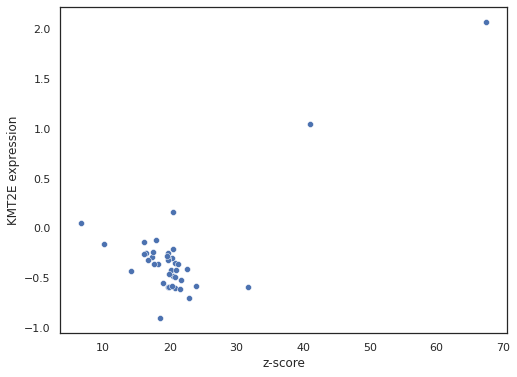

In [13]:
plot_expression_vs_ecDNA_by_metacell(SAMPLE,2,'KMT2E')

In [41]:
# 9/13
# Plot ecDNA z-scores against each other. Color by cluster.
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import itertools

In [67]:
SAMPLE="RCMB56-ht"
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")
sns.despine()


<Figure size 576x432 with 0 Axes>

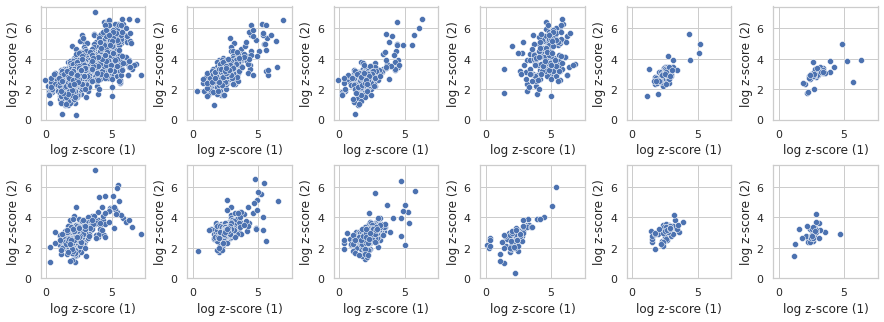

In [74]:
def get_poisson_scores(sample,ecDNA):
    if not str(ecDNA).startswith('ecDNA'):
        ecDNA='ecDNA'+str(ecDNA)
    poisson_tbl="../2021-08-17_featurecounts-permutation-2/"+sample+"_"+ecDNA+"_poisson.tsv"
    df = pd.read_csv(poisson_tbl,sep='\t',index_col=0)
    return df[['z-score']]

def get_seurat_metadata(sample):
    sample = sample.lower()
    file = "../2021-08-29_seurat/"+sample+"_seurat_metadata.tsv"
    df = pd.read_csv(file,sep='\t',index_col=0)
    return df

def plot_pairwise_ecDNA(sample,e1,e2):
    d1 = np.log(get_poisson_scores(sample,e1)+2)
    d2 = np.log(get_poisson_scores(sample,e2)+2)
    x = "log "+d1.columns[0]+" ("+str(e1)+")"
    d1.columns = [x]
    y = "log "+d2.columns[0]+" ("+str(e2)+")"
    d2.columns = [y]
    df = pd.concat([
        d1,
        d2,
        get_seurat_metadata(sample)],
        axis=1,join='inner'
    )
    sns.scatterplot(data=df,x=x,y=y,hue='seurat_clusters',palette="Paired")
    return scipy.stats.pearsonr(df[x],df[y])
    #return df

#plot_pairwise_ecDNA(SAMPLE,1,2)

def multiplot_pairwise_ecDNA(sample,e1,e2):
    d1 = np.log(get_poisson_scores(sample,e1)+2)
    d2 = np.log(get_poisson_scores(sample,e2)+2)
    x = "log "+d1.columns[0]+" ("+str(e1)+")"
    d1.columns = [x]
    y = "log "+d2.columns[0]+" ("+str(e2)+")"
    d2.columns = [y]
    df = pd.concat([
        d1,
        d2,
        get_seurat_metadata(sample)],
        axis=1,join='inner'
    )
    if sample.lower() == 'rcmb56-ht':
        w=6; h=2
    elif sample.lower() == 'rcmb56-pdx':
        raise NotImplementedError()
    fig,axes = plt.subplots(h,w, figsize=(15,5))
    plt.subplots_adjust( hspace=0.4, wspace=0.4)
    sns.scatterplot(data=df,x=x,y=y,ax=axes[0,0],palette="Paired")
    #palette = itertools.cycle(sns.color_palette("Paired"))
    xlim = axes[0,0].get_xlim()
    ylim = axes[0,0].get_ylim()
    for i in range(len(pd.unique(df['seurat_clusters']))):
        data = df[df['seurat_clusters']==i]
        axes[(i+1)%h,(i+1)//h].set(ylim=ylim,xlim=xlim)
        sns.scatterplot(data=data,
                        x=x,y=y,
                        #palette=next(palette),
                        ax=axes[(i+1)%h,(i+1)//h]
                       )

multiplot_pairwise_ecDNA(SAMPLE,1,2)

(0.6628595654369823, 0.0)

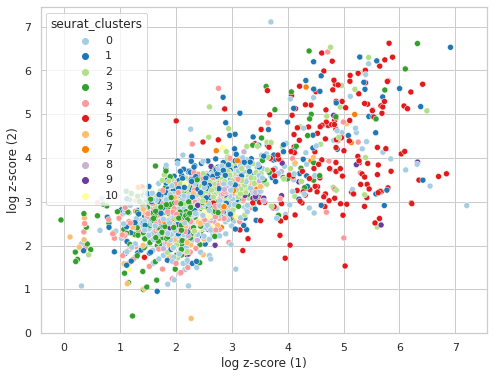

In [72]:
plot_pairwise_ecDNA(SAMPLE,1,2)

In [75]:
df = get_seurat_metadata(SAMPLE)
df[df['seurat_clusters']==3]
df

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_ATAC,nFeature_ATAC,nCount_SCT,nFeature_SCT,SCT.weight,ATAC.weight,wsnn_res.0.8,seurat_clusters
AAACATGCAAATGCCC-1,SeuratProject,10461,3261,0.325017,12657,5758,3286,1613,0.617265,0.382735,1,1
AAACATGCACAACAAA-1,SeuratProject,1244,942,0.000000,5262,2438,2564,1098,0.637447,0.362553,6,6
AAACCAACATAATCGT-1,SeuratProject,6430,3039,0.279938,24495,9656,4178,2771,0.420572,0.579428,5,5
AAACCGAAGTGCACGC-1,SeuratProject,4596,2468,0.174064,13282,6254,3850,2460,0.449795,0.550205,0,0
AAACCGGCAGTTTGTG-1,SeuratProject,8724,2955,0.000000,9000,4269,3614,1963,0.756184,0.243816,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGGCAAGGTAAC-1,SeuratProject,2285,1535,0.087527,9646,4570,2613,1531,0.503802,0.496198,5,5
TTTGTGTTCCTGCGAA-1,SeuratProject,2769,1655,0.000000,4297,2192,2885,1654,0.514936,0.485064,4,4
TTTGTGTTCGACCTGA-1,SeuratProject,2225,1443,0.134831,4017,2007,2702,1440,0.655709,0.344291,0,0
TTTGTTGGTGATCAGC-1,SeuratProject,3708,1830,1.618123,4202,2159,3531,1829,0.522764,0.477236,1,1


In [1]:
# 9/3
# Want to..
# - correlate ecDNA z-score against DNTTIP2 status
# - correlate ecDNA z-score against cell embeddings

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import os
os.chdir('/mnt/c/Users/ochapman/Documents/Mesirov/scRNA+ATAC/2021-08-31_correlate-ecDNA-status')

In [43]:
SAMPLE="RCMB56-pdx"
ECDNA=str(2)
GENE='DNTTIP2'
poisson_tbl="../2021-08-17_featurecounts-permutation-2/"+SAMPLE+"_ecDNA"+ECDNA+"_poisson.tsv"
gene_tbl="../2021-08-29_seurat/"+SAMPLE+"_"+GENE.lower()+".sct.tsv"
atac_embeddings_tbl="../2021-08-29_seurat/"+SAMPLE+"_seurat_atac_cell_embeddings.tsv"
rna_embeddings_tbl="../2021-08-29_seurat/"+SAMPLE+"_seurat_rna_cell_embeddings.tsv"

(0.005056695784942524, 0.5996936425817945)

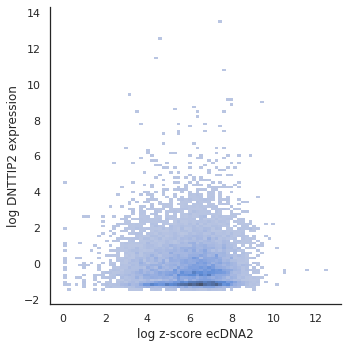

In [44]:
def correlate_gene_expression(poisson_tbl,gene_tbl,gene='DNTTIP2'):
    p = pd.read_csv(poisson_tbl,sep='\t',index_col=0)
    p=p["z-score"]
    p=p.map(lambda x:max(x,1))
    p=np.log2(p)
    g = pd.read_csv(gene_tbl,sep='\t',index_col=1)
    g=g[gene]
    df = pd.concat([p,g],axis=1,join='inner')
    plot = sns.displot(data=df,x='z-score',y=gene)
    plot.set_axis_labels("log z-score ecDNA"+str(ECDNA), "log "+gene+" expression")
    return scipy.stats.pearsonr(df['z-score'],df[gene])
correlate_gene_expression(poisson_tbl,gene_tbl,GENE)

[0.24622210295567254, -0.37403275017619525, -0.294342768759063, 0.06411911652632787, -0.2123165728775612, -0.06167113299568094, 0.015738152055494104, -0.04933450522515114, 0.4238609082647651, 0.07648363117843407]
Component 8 has the greatest correlation.


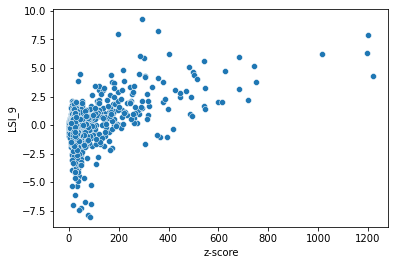

In [121]:
def correlate_rna_pcs(poisson_tbl,embeddings_tbl):
    p = pd.read_csv(poisson_tbl,sep='\t',index_col=0)
    p=p["z-score"]
    #p=np.log2(p+2)
    e = pd.read_csv(embeddings_tbl,sep='\t',index_col=0)
    # align indices
    i = pd.concat([p,e],axis=1,join='inner').index
    p = p[i]
    e = e.loc[list(i)]
    correlations = [scipy.stats.pearsonr(p,e.iloc[:,i])[0] for i in range(10)]
    print(correlations)
    i = np.argmax(np.abs(correlations))
    print("Component {} has the greatest correlation.".format(i))
    df = pd.concat([p,e.iloc[:,i]],axis=1,join='inner')
    sns.scatterplot(data=df,x=df.columns[0],y=df.columns[1])
    return
correlate_rna_pcs(poisson_tbl,atac_embeddings_tbl)

[0.2071242276743811, -0.3013193068534167, 0.1055877347258943, -0.13756794762993113, 0.026085005195324758, 0.033496729513110717, 0.0006639085182073783, 0.014207016691149855, 0.003510235113611081, -0.05018022168874041]
Component 1 has the greatest correlation.


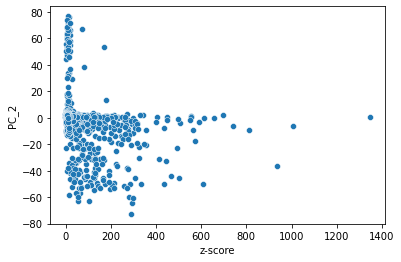

In [124]:
correlate_rna_pcs(poisson_tbl,rna_embeddings_tbl)